In [3]:
#Import
import numpy as np
import pandas as pd
from pathlib import Path
import os
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

#Path
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_MAMRA_577.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_MAMRA_585.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_MAMRA_593.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_MAMRA_601.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_MAMRA_609.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_REGULAR_785.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_REGULAR_793.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_REGULAR_801.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_REGULAR_809.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_REGULAR_817.jpg
./kaggle/input\fruit-and-vegetable-image-recognition\test\almond\ALMOND_SANORA_481.jpg
./kaggle/input\fruit-and-vegetable-image-re

In [4]:
# Listes des images train
train_dir = Path('kaggle/input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))


In [5]:
# Listes des images test
test_dir = Path('kaggle/input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))


In [6]:
# Listes des images validation
val_dir = Path('kaggle/input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))


In [7]:
#Dataframe avec le path et les labels
def image_processing(filepath):
    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('-- Entrainement settings --\n')
print(f'Nombre d\'images : {train_df.shape[0]}\n')
print(f'Nombre de labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Entrainement settings --

Nombre d'images : 3313

Nombre de labels: 41

Labels: ['tomato' 'kiwi' 'almond' 'garlic' 'ginger' 'strawberry' 'banana' 'orange'
 'raddish' 'eggplant' 'pomegranate' 'spinach' 'grapes' 'cabbage'
 'capsicum' 'corn' 'sweetcorn' 'lemon' 'sweetpotato' 'turnip'
 'bell pepper' 'onion' 'potato' 'beetroot' 'soy beans' 'jalepeno' 'carrot'
 'mango' 'cucumber' 'cauliflower' 'pineapple' 'cashew' 'apple' 'paprika'
 'chilli pepper' 'raisin' 'lettuce' 'pear' 'watermelon' 'peas' 'fig']


In [10]:
train_df.head(5)

,Filepath,Label
0,kaggle\input\fruit-and-vegetable-image-recogni...,tomato
1,kaggle\input\fruit-and-vegetable-image-recogni...,kiwi
2,kaggle\input\fruit-and-vegetable-image-recogni...,almond
3,kaggle\input\fruit-and-vegetable-image-recogni...,garlic
4,kaggle\input\fruit-and-vegetable-image-recogni...,ginger


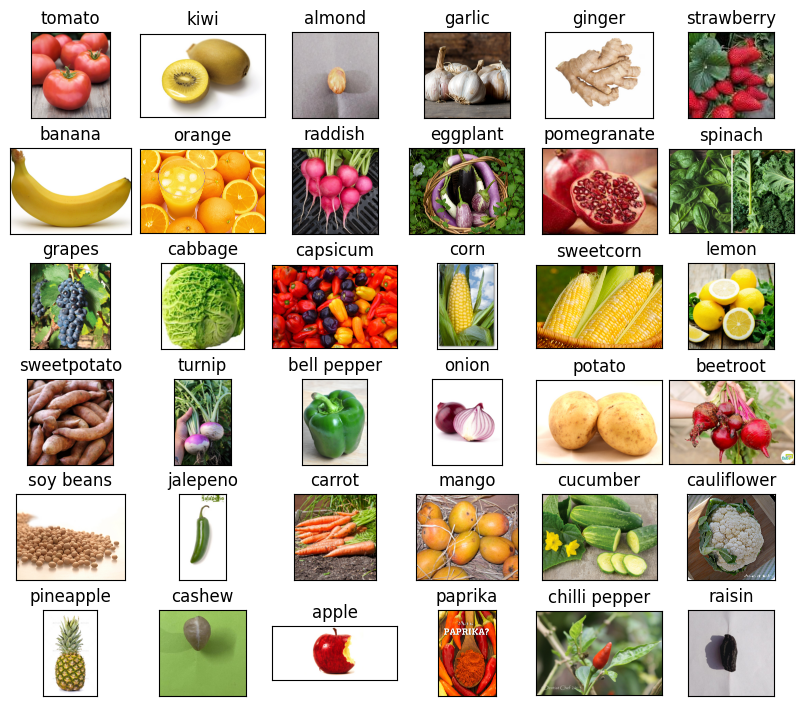

In [11]:
# Dataframe avec un label de chaque catégorie
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 3313 validated image filenames belonging to 41 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 447 validated image filenames belonging to 41 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 447 validated image filenames belonging to 41 classes.


In [43]:
#Modèle pré-entrainé 
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [17]:
#Output & Input du modèle
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(41, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
104/104 [==============================] - 106s 970ms/step - loss: 1.7173 - accuracy: 0.5563 - val_loss: 0.5314 - val_accuracy: 0.8389
Epoch 2/5
104/104 [==============================] - 109s 1s/step - loss: 0.5337 - accuracy: 0.8322 - val_loss: 0.2732 - val_accuracy: 0.9284
Epoch 3/5
104/104 [==============================] - 113s 1s/step - loss: 0.3209 - accuracy: 0.8965 - val_loss: 0.2676 - val_accuracy: 0.9105
Epoch 4/5
104/104 [==============================] - 109s 1s/step - loss: 0.2016 - accuracy: 0.9378 - val_loss: 0.1920 - val_accuracy: 0.9441
Epoch 5/5
104/104 [==============================] - 103s 984ms/step - loss: 0.1363 - accuracy: 0.9602 - val_loss: 0.2043 - val_accuracy: 0.9441


In [20]:
model.save('modelFinal.h5')

In [50]:
#Pourcentage de précision
train_accuracy = model.evaluate(train_images)[1] 
test_accuracy = model.evaluate(test_images)[1] 
print('Training Accuracy: ', train_accuracy) 
print('Testing Accuracy: ', test_accuracy)

14/14 [==============================] - 14s 964ms/step - loss: 0.2043 - accuracy: 0.9441
Training Accuracy:  0.9749471545219421
Testing Accuracy:  0.9440715909004211


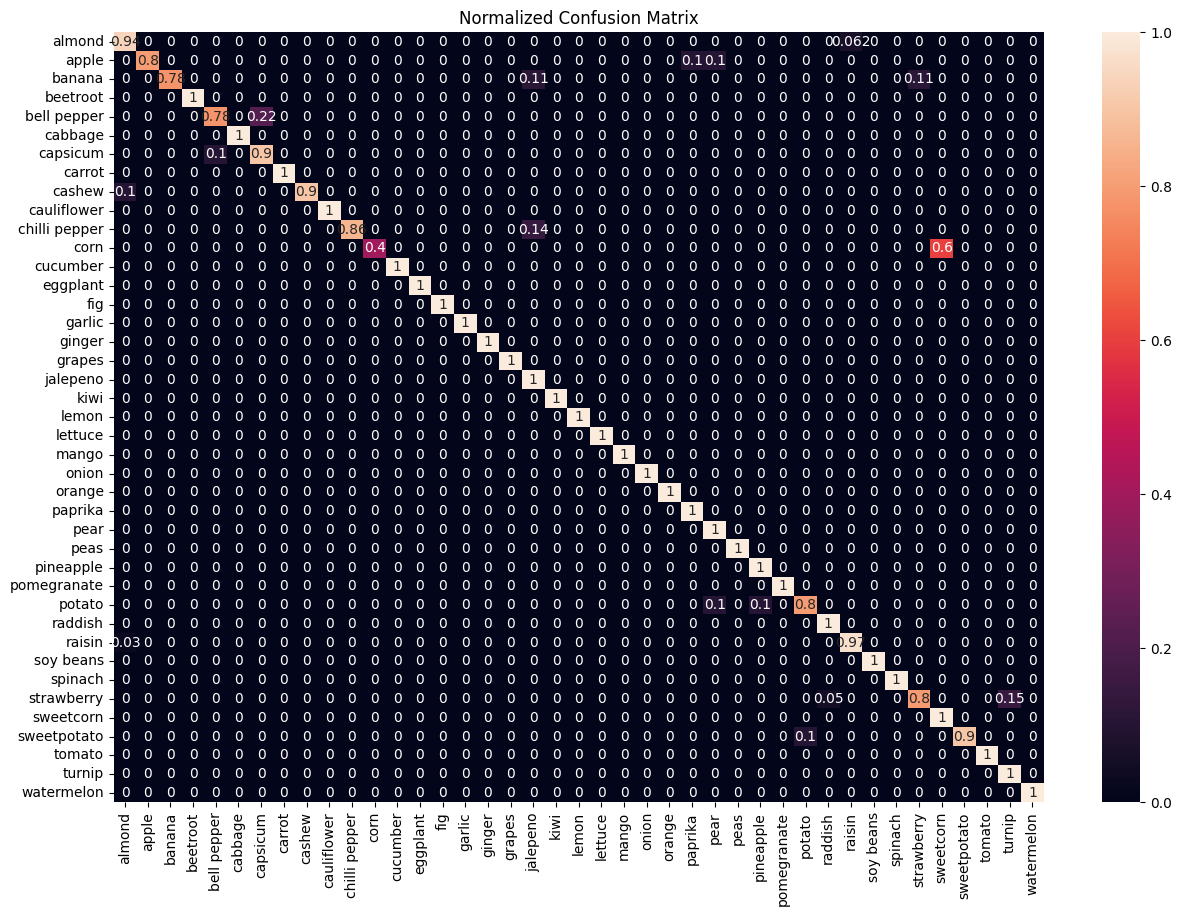

In [54]:
#Matrice de confusion

labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = [labels[k] for k in test_images.classes]

from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True,
xticklabels = sorted(set(y_test)),
yticklabels = sorted(set(y_test))
)
plt.title('Normalized Confusion Matrix')
plt.show()

